In [ ]:
!pip install Roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="Q7uEJEFVurtpDitMQa1I")
project = rf.workspace("d7i").project("tooth_2-_for_testing34")
version = project.version(1)
dataset = version.download("yolov8")



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.4 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to tooth_2-_for_testing34-1 in yolov8:: 100%|██████████| 22784/22784 [00:03<00:00, 7455.31it/s]


In [ ]:
import torch
from pathlib import Path
import matplotlib.pyplot as plt
import cv2
import os
import glob
from ultralytics import YOLO


In [ ]:


base_path = "/content/tooth_2-_for_testing34-1

def apply_clahe(image):
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

    l, a, b = cv2.split(lab)

    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    cl = clahe.apply(l)

    limg = cv2.merge((cl, a, b))

    enhanced_image = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)

    return enhanced_image

subdirectories = ['train/images', 'valid/images', 'test/images']

for subdir in subdirectories:
    image_paths = glob.glob(os.path.join(base_path, subdir, '*.jpg')) + \
                  glob.glob(os.path.join(base_path, subdir, '*.jpeg')) + \
                  glob.glob(os.path.join(base_path, subdir, '*.png'))


    for image_path in image_paths:
        image = cv2.imread(image_path)

        enhanced_image = apply_clahe(image)

        cv2.imwrite(image_path, enhanced_image)

    print(f"CLAHE applied in place to all images in {subdir} successfully!")

In [ ]:

model_path = '/content/yolov8x_model.pt'
print(os.path.exists(model_path))  # Should return True if the file exists

True


In [ ]:

from ultralytics import YOLO

model_path = '/content/yolov8x_model.pt'
model = YOLO(model_path)



In [ ]:

def count_images(folder_path):


    image_extensions = ['.jpg', '.jpeg', '.png', '.gif']
    count = 0

    for root, _, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith(tuple(image_extensions)):
                count += 1

    return count



root_folder = "/content/tooth_2-_for_testing34-1"

train_count = count_images(os.path.join(root_folder, "train"))
valid_count = count_images(os.path.join(root_folder, "valid"))
test_count = count_images(os.path.join(root_folder, "test"))

print("Number of images in training set:", train_count)
print("Number of images in validation set:", valid_count)
print("Number of images in test set:", test_count)


Number of images in training set: 10730
Number of images in validation set: 450
Number of images in test set: 206


In [ ]:
data_path = '/content/tooth_2-_for_testing34-1/data.yaml'
results = model.val(data=data_path)

print(results)





Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)


val: Scanning /content/tooth_2-_for_testing34-1/valid/labels... 450 images, 0 backgrounds, 0 corrupt: 100%|██████████| 450/450 [00:00<00:00, 1144.69it/s]


val: New cache created: /content/tooth_2-_for_testing34-1/valid/labels.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:05<00:00,  5.43it/s]


                   all        450       1257      0.852      0.745      0.813      0.558
                 decay        450       1257      0.852      0.745      0.813      0.558
Speed: 0.6ms preprocess, 5.7ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/val2
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b5546244bb0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,

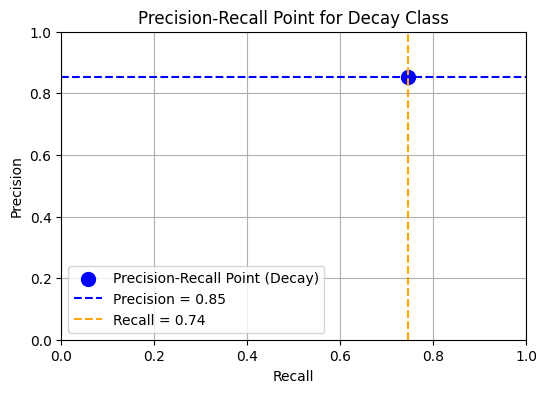

In [ ]:
import matplotlib.pyplot as plt

# Extract precision and recall for the "decay" class
precision = metrics.box.p[0]  # Single precision value
recall = metrics.box.r[0]      # Single recall value

# Plotting as a single point
plt.figure(figsize=(6, 4))
plt.scatter(recall, precision, color='blue', s=100, label='Precision-Recall Point (Decay)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Point for Decay Class')
plt.xlim(0, 1)  # Set limits for better visibility
plt.ylim(0, 1)

# Adding lines for clarity
plt.axhline(y=precision, color='blue', linestyle='--', label='Precision = {:.2f}'.format(precision))
plt.axvline(x=recall, color='orange', linestyle='--', label='Recall = {:.2f}'.format(recall))

plt.grid()
plt.legend()
plt.show()

In [ ]:
print("Precision:", metrics.box.p)
print("Recall:", metrics.box.r)

Precision: [    0.85241]
Recall: [    0.74463]


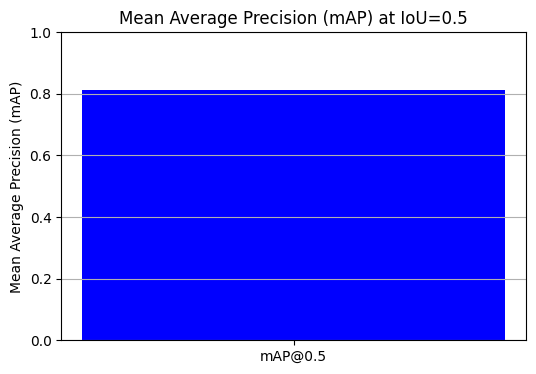

In [ ]:
import matplotlib.pyplot as plt

# Assuming `results` contains the validation metrics
metrics = results  # Change this if your results are stored differently

# Extract mAP50 value
map50 = metrics.box.map50  # mAP at IoU=0.5

# Plot mAP50
plt.figure(figsize=(6, 4))
plt.bar(['mAP@0.5'], [map50], color='blue')

# Add labels and title
plt.ylabel('Mean Average Precision (mAP)')
plt.title('Mean Average Precision (mAP) at IoU=0.5')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.grid(axis='y')
plt.show()